#   <center><span style = "font-size:1.5em;">  AE4 Recommender Challenge EDSA
  
#### <center><span style = "font-size:1em;"> Unsupervised_learning_AE4_DSFT21

## Overview

The task that was presented was to build a recommendation system with a rating system based of the [Movielens](https://movielens.org/) dataset. The notebook discusses how the data was retrieved clean and prepared in order to build the recommendation system.

## Table of Contents

1. <a href ="#1.-Challenge-Description">Challenge Description</a>
2. <a href ="#2.-Evaluation-Metric">Evaluation Metric</a>
3. <a href ="#3.-Comet-Experiment">Comet Experiment</a>
4. <a href ="#4.-Importing-Libraries">Importing Libraries</a>
5. <a href ="#5.-Importing-Data">Importing Data</a>
6. <a href ="#6.-Data-Description">Data Description<a/>
7. <a href ="#7.-Exploratory-Data-Analysis">Exploratory Data Analysis</a>
8. <a href ="#8.-Model-Building">Model Building</a>
9. <a href ="#9.-Recommendation-System">Recommendation System</a>

## 1. Challenge Description

In today’s technology driven world, recommender systems are socially and economically critical for ensuring that individuals can make appropriate choices surrounding the content they engage with on a daily basis. One application where this is especially true surrounds movie content recommendations; where intelligent algorithms can help viewers find great titles from tens of thousands of options.

With this context, EDSA is challenging US to construct a recommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed based on their historical preferences.

Providing an accurate and robust solution to this challenge has immense economic potential, with users of the system being exposed to content they would like to view or purchase - generating revenue and platform affinity.

## 2. Evaluation Metric

## 3. Comet Experiment 

**Comet experiment**

In [1]:
# import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="vJUo9ahBGdk2sNcgaTzia7Z0T",
    project_name="unsupervised-movie-predict",
    workspace="katlehomphuthi",
)


COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/katlehomphuthi/unsupervised-movie-predict/a0fc862c6c554b0fa539a6c9ccb19d24



## 4. Importing Libraries
In this notebook we shall be importing various python libraries to assist with constructing our classification model.

In [2]:
#Libraries used for data preprocessing and data retrival
import numpy as np
import pandas as pd
import cufflinks as cf

#Data preparation and Modelling 
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import TruncatedSVD

# Entity featurization and similarity computation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import itertools

# Visualisations software 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style='whitegrid', palette='muted',
        rc={'figure.figsize': (15,10)})

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')

## 5. Importing Data

In [3]:
#Movies dataframe
movies_df = pd.read_csv('movies.csv')

#Genome_scores dataframe
gs_df = pd.read_csv('genome_scores.csv')

#Genome_tags dataframe
gt_df = pd.read_csv('genome_tags.csv')

#imbd dataframe
imdb_df = pd.read_csv('imdb_data.csv')

#links dataframe
links_df = pd.read_csv('links.csv')

#tags dataframe
tags_df = pd.read_csv('tags.csv')

#train dataframe
train = pd.read_csv('train.csv')

The data was obtained from the [MovieLens](https://movielens.org/) which has the several millions 5-star ratings obtained from users using the online recommendation system. The IMBD (imbd_df) was legally scraped from [IMBD] (https://www.imdb.com/).

## 6. Data Description

Exploring the different supplied files:
 * 6.1) Movies ( movies_df)
 * 6.2) Genome Scores and tags (gs_df & gt_df)
 * 6.3) Imbd database of each movie (imbd_df)
 * 6.4) train and test datasets

#### 6.1 Movies datasets

In [4]:
movies_df.info() # Get concise summary of DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [5]:
movies_df.head() # Get the first 5 observations 

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


This dataset consists of 62423 observations or rather movies and contains the extra infomation about the movies such as the titles and genres.

#### 6.2 Genome Scores and tags (gs_df & gt_df)

The tag genome encodes how strongly movies exhibit particular properties represented by tags (atmospheric, thought-provoking, realistic, etc.). The tag genome was computed using a machine learning algorithm on user-contributed content including tags, ratings, and textual reviews. The process is further described by [GroupLens](http://files.grouplens.org/papers/tag_genome.pdf).

In [6]:
gt_df.info() # Get concise summary of the Genome_tag Dataframe 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tagId   1128 non-null   int64 
 1   tag     1128 non-null   object
dtypes: int64(1), object(1)
memory usage: 17.8+ KB


In [7]:
gs_df.info() # Get concise summary of the Genome_score Dataframe 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15584448 entries, 0 to 15584447
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   tagId      int64  
 2   relevance  float64
dtypes: float64(1), int64(2)
memory usage: 356.7 MB


There is more than 15000000 genome scores present and there is atleast 1128 observations in the genome tags dataframe. These datasets gives us the tags and their relative score.

#### 6.3 Imdb database of each movie (imdb_df)

In [8]:
imdb_df.info() # Get concise of imdb database

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movieId        27278 non-null  int64  
 1   title_cast     17210 non-null  object 
 2   director       17404 non-null  object 
 3   runtime        15189 non-null  float64
 4   budget         7906 non-null   object 
 5   plot_keywords  16200 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


In [9]:
imdb_df.head() # Shows the first 5 observations

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


The imdb database was legally scraped of [IMDB](https://www.imdb.com/). This dataset gives more information about the movie such as the directors and the casts of the movies.

#### 6.4 Train dataset

This dataset will be used to train the model.

In [10]:
train.info() # Get the summary of the dataset's metadata

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB


The data has more than 10000000 observations where the userId represent the users data system, moviesId represents and the rating represents the user's ratings for each movie.

In [11]:
train.isnull().sum() # check if there are any null values

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

There are not any null values present in the train dataset.

In [12]:
train.head() # show the first 5 observations 

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


## 7. Exploratory Data Analysis

This section we are doing a further deep analysis of the data and get more insights on the data itself.

#### 7.1 User analysis

In [13]:
print('There are ',train["userId"].nunique(), 'users and',train.movieId.nunique(),'movies in the database/dataframe')

There are  162541 users and 48213 movies in the database/dataframe


#### 7.2 Ratings analysis

In [14]:
train.rating.value_counts()

4.0    2652977
3.0    1959759
5.0    1445230
3.5    1270642
4.5     880516
2.0     656821
2.5     505578
1.0     311213
1.5     159731
0.5     157571
Name: rating, dtype: int64

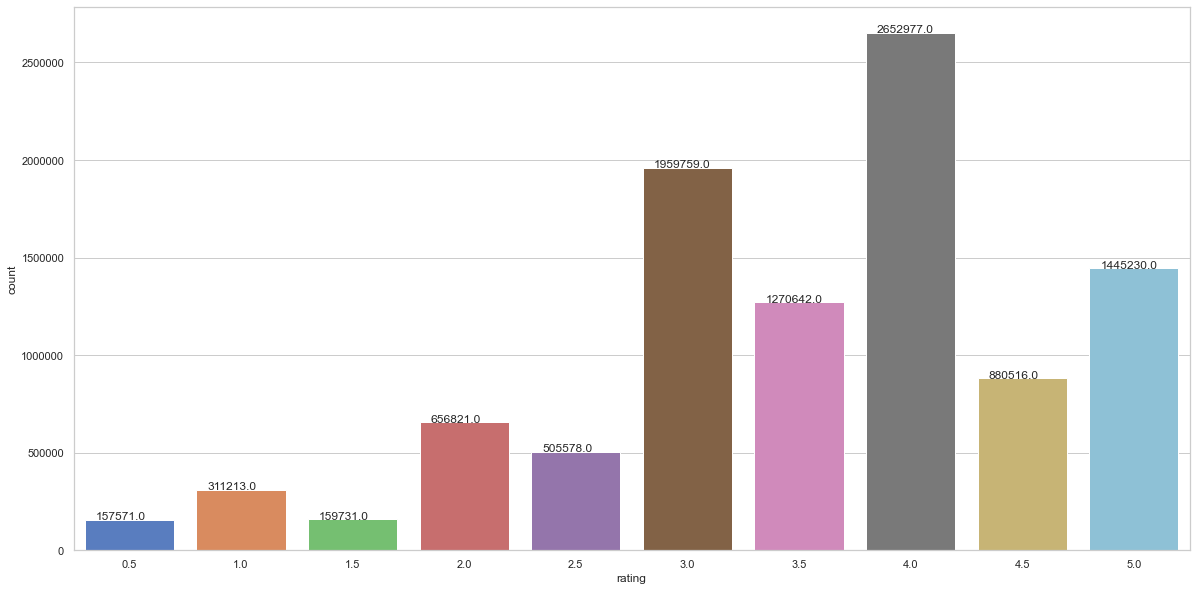

In [19]:
fig, ax = plt.subplots(figsize=(20, 10))

sns.countplot(ax=ax, x='rating', data=train)
plt.ticklabel_format(style='plain', axis='y', useOffset=False)

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50)) 
plt.show()

In [21]:
train_movies = train.merge(movies_df,on = 'movieId') # Merges the movie and train datasets 
train_movies.head(10) # Shows the first 10 observations

,userId,movieId,rating,timestamp,title,genres
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller
1,87388,57669,3.5,1237455297,In Bruges (2008),Comedy|Crime|Drama|Thriller
2,137050,57669,4.0,1425631854,In Bruges (2008),Comedy|Crime|Drama|Thriller
3,120490,57669,4.5,1408228517,In Bruges (2008),Comedy|Crime|Drama|Thriller
4,50616,57669,4.5,1446941640,In Bruges (2008),Comedy|Crime|Drama|Thriller
5,99887,57669,0.5,1448839196,In Bruges (2008),Comedy|Crime|Drama|Thriller
6,120194,57669,4.5,1479382352,In Bruges (2008),Comedy|Crime|Drama|Thriller
7,847,57669,3.5,1232893563,In Bruges (2008),Comedy|Crime|Drama|Thriller
8,47201,57669,4.5,1464351173,In Bruges (2008),Comedy|Crime|Drama|Thriller
9,94499,57669,4.5,1316689295,In Bruges (2008),Comedy|Crime|Drama|Thriller


In [22]:
train_movies.drop(columns=['timestamp'],inplace=True) # Dropping the timestamp column

In [23]:
# Get the  avarage rating for each movie in the data 
total_ratings = train_movies.groupby(['movieId','genres']).mean()['rating'].reset_index()

# The first 5 observations
total_ratings.head()

,movieId,genres,rating
0,1,Adventure|Animation|Children|Comedy|Fantasy,3.889971
1,2,Adventure|Children|Fantasy,3.263414
2,3,Comedy|Romance,3.132325
3,4,Comedy|Drama|Romance,2.878099
4,5,Comedy,3.059165


In [24]:
# Create a new dataframe from the train_movie dataframe  
train2 = train_movies.copy()

# Drop any duplicated information 
train2.drop_duplicates(['title','genres'],inplace = True)

In [25]:
# Merge the the train2 and the total_ratings to create a new data 
train2 = train2.merge(total_ratings, on = 'movieId')
train2.drop(columns=['userId','rating_x','genres_y'],inplace=True) # Delete the duplicated 
train2.rename(columns={'genres_x':'genres','rating_y':'rating'},inplace=True) # Rename the columns

# Show the  first 5 observations
train2.head()

,movieId,title,genres,rating
0,57669,In Bruges (2008),Comedy|Crime|Drama|Thriller,3.889842
1,5,Father of the Bride Part II (1995),Comedy,3.059165
2,5459,Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (...,Action|Comedy|Sci-Fi,3.004276
3,32296,Miss Congeniality 2: Armed and Fabulous (2005),Adventure|Comedy|Crime,2.535714
4,366,Wes Craven's New Nightmare (Nightmare on Elm S...,Drama|Horror|Mystery|Thriller,2.972609


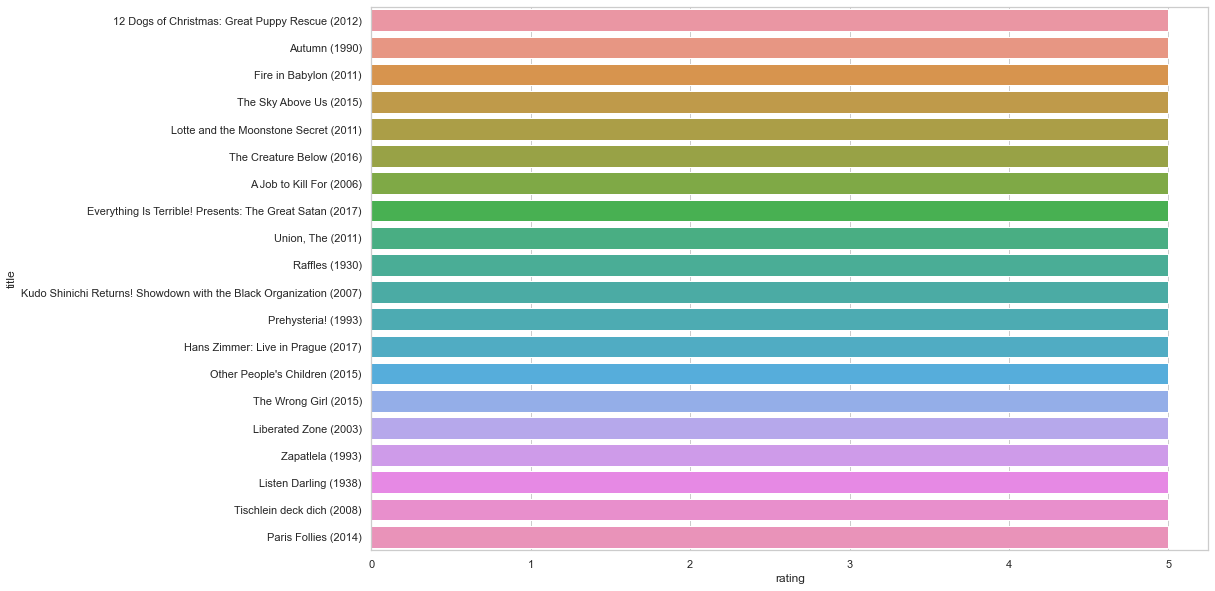

In [36]:
# Top 20 highly rated movies
train2 = train2.sort_values(by='rating', ascending=False) # Sort the values

sns.barplot(x = "rating", y="title", data = train2.head(20)) # Plot a barplot
plt.show() # Show the plot

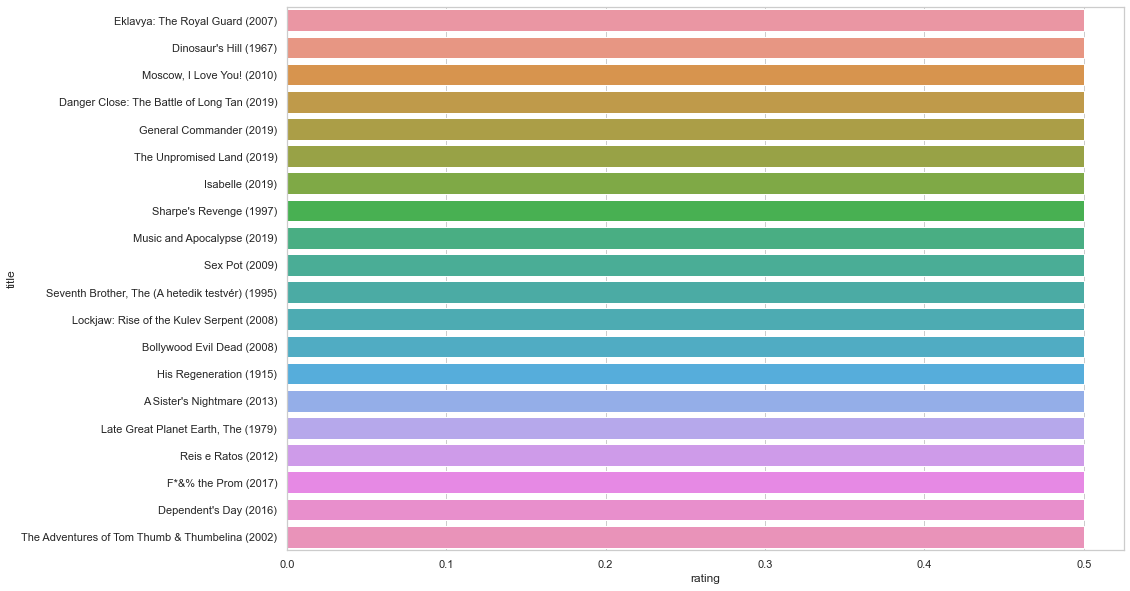

In [37]:
# Top 20 lowest rated 

sns.barplot(x = "rating", y="title", data = train2.tail(20)) # Plot a barplot
plt.show() # Show the plot

In [41]:
train3 = train2.copy() # Make a copy of the Train2 dataset

In [43]:
# Create a user dataset to check how many time it has been voted for
user_rated = pd.DataFrame(train['movieId'].value_counts().reset_index()) # Create a user dataframe using groupby function
user_rated.rename(columns = {'index':'movieId','movieId':'voted'},inplace = True) # Rename the columns 
train3 = train3.merge(user_rated, on ='movieId') # Combine the train3 dataset with the User_rated data
train3.head() # Show the first 5 observations

,movieId,title,genres,rating,voted
0,179535,12 Dogs of Christmas: Great Puppy Rescue (2012),Children|Comedy,5.0,1
1,134607,Autumn (1990),Comedy,5.0,1
2,142679,Fire in Babylon (2011),Documentary,5.0,1
3,135238,The Sky Above Us (2015),Drama|War,5.0,1
4,129828,Lotte and the Moonstone Secret (2011),Animation|Children,5.0,1


In [44]:
# Filter the data 
train3 = train3[train3['voted'] > 10] # Find the movies which have the us voted for more than 50 
train3.head() # Show the first 5 observations 

,movieId,title,genres,rating,voted
970,174551,Obsession (1965),Comedy,4.772727,11
1066,171011,Planet Earth II (2016),Documentary,4.517084,439
1334,171705,Den radio (2001),(no genres listed),4.500000,13
1835,159817,Planet Earth (2006),Documentary,4.473294,674
1836,171495,Cosmos,(no genres listed),4.456897,116


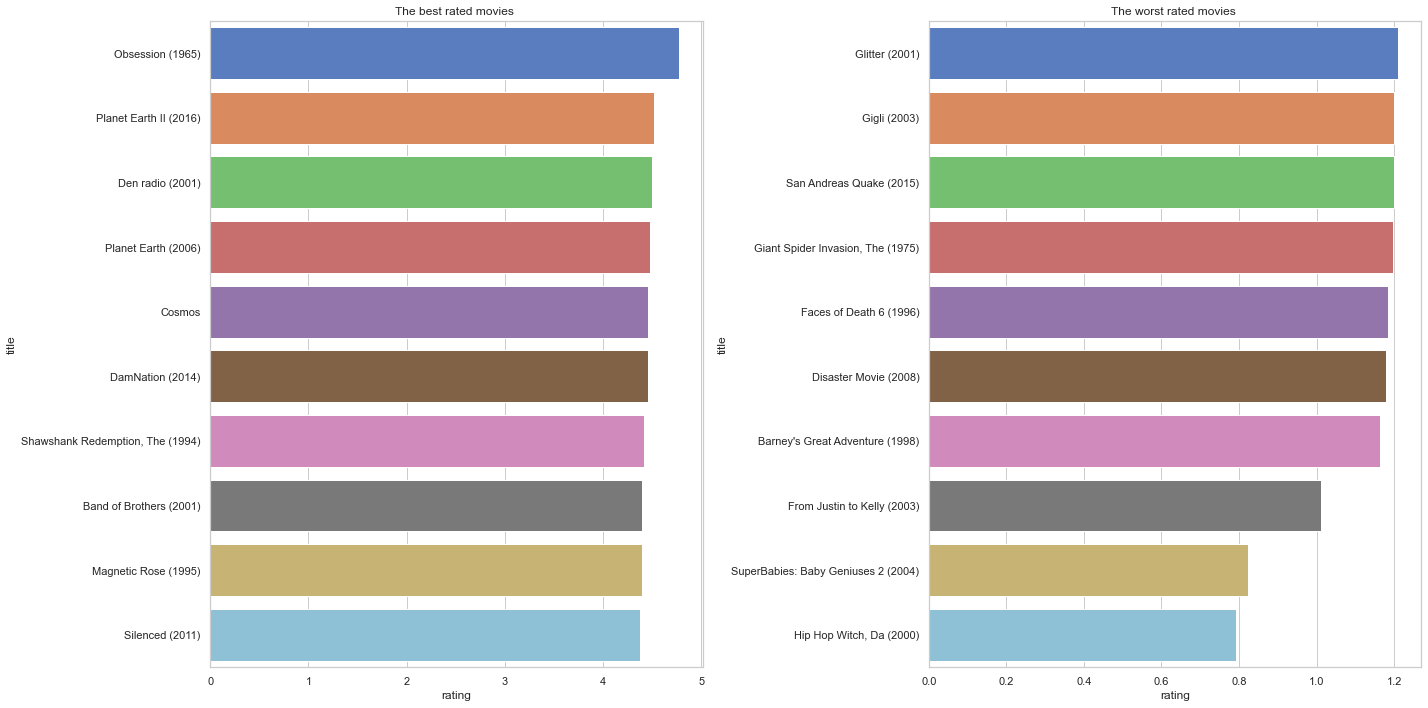

In [53]:
fig, ax  = plt.subplots(1,2,figsize=(20,10))
sns.barplot(ax=ax[0], x='rating',y = 'title', data=train3.head(10))
ax[0].set_title('The best rated movies ')

sns.barplot(ax=ax[1],x = 'rating',y = 'title', data = train3.tail(10))
ax[1].set_title('The worst rated movies ')

fig.tight_layout()
plt.show()

#### 7.3 Genres

In [54]:
movies = movies_df.copy() # Create a new copy of the Movies dataframe

In [55]:
movies['genres'] = movies.genres.str.split('|')
#Using regular expressions to find a year stored between parentheses
#We specify the parantheses so we don't conflict with movies that have years in their titles
movies['year'] = movies.title.str.extract('(\(\d\d\d\d\))',expand=False)
#Removing the parentheses
movies['year'] = movies.year.str.extract('(\d\d\d\d)',expand=False)
#Removing the years from the 'title' column
movies['title'] = movies.title.str.replace('(\(\d\d\d\d\))', '')
#Applying the strip function to get rid of any ending whitespace characters that may have appeared
movies['title'] = movies['title'].apply(lambda x: x.strip())
movies.head()

,movieId,title,genres,year
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995
2,3,Grumpier Old Men,"[Comedy, Romance]",1995
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]",1995
4,5,Father of the Bride Part II,[Comedy],1995


In [56]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
 3   year     62013 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.9+ MB


Year feature is in the wrong datatype. 

In [59]:
movies.isnull().sum()

movieId      0
title        0
genres       0
year       410
dtype: int64

In [65]:
movies['year'] = pd.to_numeric(movies['year'], errors='coerce')
movies = movies.dropna(subset=['year'])
movies['year'] = movies['year'].astype(int)
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62013 entries, 0 to 62422
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62013 non-null  int64 
 1   title    62013 non-null  object
 2   genres   62013 non-null  object
 3   year     62013 non-null  int32 
dtypes: int32(1), int64(1), object(2)
memory usage: 2.1+ MB


In [69]:
movies.head()

,movieId,title,genres,year
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995
2,3,Grumpier Old Men,"[Comedy, Romance]",1995
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]",1995
4,5,Father of the Bride Part II,[Comedy],1995


In [68]:
#Copying the movie dataframe into a new one since we won't need to use the genre information in our first case.
moviesWithGenres_df = movies.copy()

#For every row in the dataframe, iterate through the list of genres and place a 1 into the corresponding column
for index, row in movies.iterrows():
    for genre in row['genres']:
        moviesWithGenres_df.at[index, genre] = 1
#Filling in the NaN values with 0 to show that a movie doesn't have that column's genre
moviesWithGenres_df = moviesWithGenres_df.fillna(0)
moviesWithGenres_df.head()

,movieId,title,genres,year,Adventure,Animation,Children,Comedy,Fantasy,Romance,...,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Grumpier Old Men,"[Comedy, Romance]",1995,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]",1995,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Father of the Bride Part II,[Comedy],1995,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
 moviesWithGenres_df.drop('genres', inplace= True, axis=1)


## 8. Model Building

## 9. Recommendation System 

Using the movies dataset created in section 7.3

In [71]:
movies = movies.set_index('movieId')
movies['genres'] = movies['genres'].str.join(' ')
movies.head()

,title,genres,year
movieId,,,
1,Toy Story,Adventure Animation Children Comedy Fantasy,1995
2,Jumanji,Adventure Children Fantasy,1995
3,Grumpier Old Men,Comedy Romance,1995
4,Waiting to Exhale,Comedy Drama Romance,1995
5,Father of the Bride Part II,Comedy,1995


Using the TFIDF vectorizer to take out the most important and essential features

In [73]:
tfv = TfidfVectorizer(stop_words='english')
x = tfv.fit_transform(movies['genres'])
tfidf_df = pd.DataFrame(x.toarray(), index= movies.index.tolist())
tfidf_df.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
1,0.0,0.446606,0.488245,0.488122,0.277465,0.0,0.0,0.000000,0.496900,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.539755,0.000000,0.589929,0.000000,0.0,0.0,0.000000,0.600539,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.000000,0.000000,0.598266,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.801298,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.000000,0.000000,0.537246,0.0,0.0,0.439986,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.719569,0.0,0.0,0.0,0.0
5,0.0,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [75]:
n = 23

svd = TruncatedSVD(n_components= n-1)
latent_matrix = svd.fit_transform(tfidf_df)
latent_matrix_1_df = pd.DataFrame(latent_matrix[:,0:n], index=movies.title.tolist())
latent_matrix_1_df.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
Toy Story,0.156101,0.298005,0.008067,0.074592,1.436333e-15,-0.021839,-0.137067,0.380554,-0.131983,0.603243,...,-0.053886,-0.052044,0.073926,0.175732,0.082249,-0.038773,0.000193,-0.011227,1.773002e-16,-4.425632e-17
Jumanji,0.050185,0.042928,0.012267,0.092263,1.846528e-15,0.040462,-0.134442,0.364047,-0.095951,0.469485,...,-0.101838,-0.177373,0.371866,0.137554,0.079770,-0.036143,-0.000060,-0.012080,1.552092e-16,-4.078062e-18
Grumpier Old Men,0.390523,0.632168,-0.026448,-0.078683,-8.509877e-16,0.655864,0.061405,-0.063204,0.001577,-0.022613,...,-0.008365,-0.004463,-0.012397,-0.006497,-0.019579,-0.029969,-0.000131,0.000540,-3.915190e-17,-6.317768e-17
Waiting to Exhale,0.738628,0.382655,-0.031417,-0.134333,-2.457410e-15,0.527248,0.074774,-0.042307,-0.006438,-0.028579,...,-0.008749,-0.015880,-0.018209,-0.005180,-0.018232,-0.027434,-0.000885,0.000548,-3.091774e-17,-4.930731e-17
Father of the Bride Part II,0.386566,0.895993,-0.018963,-0.056534,-1.725697e-15,-0.196823,0.005667,-0.047949,-0.028689,-0.037079,...,0.002318,0.008261,-0.009924,0.004101,-0.002750,-0.010436,0.001168,0.000425,4.905738e-18,2.596087e-17


In [76]:
latent_matrix_1_df.shape

(62013, 22)

In [81]:
processed_genome_scores = pd.pivot_table(gs_df, values='relevance', index=['movieId'], columns = 'tagId')
processed_genome_scores.shape
final2 = processed_genome_scores

In [82]:
# Function to find the similarities
def get_Scores(title):
    input_1 = latent_matrix_1_df.loc['Toy Story']
    input_2 = final2.iloc[0]
    input_1 = np.array(input_1).reshape(1, -1)
    input_2 = np.array(input_2).reshape(1, -1)
    score_1 = cosine_similarity(latent_matrix_1_df,input_1).reshape(-1)
    score_2 = cosine_similarity(final2,input_2).reshape(-1)
    score_2_df = pd.DataFrame(score_2, columns = ['score'], index = final2.index)
    final_score = pd.merge( movies,score_2_df, on='movieId', how='left')
    final_score.drop('genres',axis=1,inplace=True)
    return final_score.sort_values('score',ascending=False).head(20)

In [84]:
df = get_Scores('Toy Story')
df

,title,year,score
movieId,,,
1,Toy Story,1995,1.000000
4886,"Monsters, Inc.",2001,0.956145
3114,Toy Story 2,1999,0.952113
2355,"Bug's Life, A",1998,0.945521
78499,Toy Story 3,2010,0.930667
6377,Finding Nemo,2003,0.928988
50872,Ratatouille,2007,0.921685
8961,"Incredibles, The",2004,0.907585
5218,Ice Age,2002,0.904823


In [85]:
experiment.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/katlehomphuthi/unsupervised-movie-predict/a0fc862c6c554b0fa539a6c9ccb19d24
COMET INFO:   Parameters:
COMET INFO:     norm         : l2
COMET INFO:     smooth_idf   : True
COMET INFO:     sublinear_tf : 1
COMET INFO:     use_idf      : True
COMET INFO:   Uploads:
COMET INFO:     environment details      : 1
COMET INFO:     filename                 : 1
COMET INFO:     git metadata             : 1
COMET INFO:     git-patch (uncompressed) : 1 (10 MB)
COMET INFO:     installed packages       : 1
COMET INFO:     notebook                 : 1
COMET INFO:     source_code              : 1
COMET INFO: ---------------------------
COMET INFO: Uploading metrics, params, and assets to Comet before program termination (may take several seconds)
COMET INFO: The Py